###Домашнее задание по результатам 8 вебинара.
1. Как было сказано ранее, GAN обучается воспроизводить реальные данные.
Поэтому Вам предлагается обучить генератор создавать точки, которые будут
лежать на графике функции
𝑦 = 𝑠𝑖𝑛 𝑥( )
𝑥 − 𝑥
10
При выполнении данного задания структура GAN остается той же, но Вам нужно:

● Сгенерировать настоящие данные

● Изменить архитектуру дискриминатора и генератора

● Без графиков домашку не принимаю

In [1]:
import os
import numpy as np
import math

from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision import datasets
from torch.autograd import Variable

import torch.nn as nn
import torch

########### Вывод изображений и их сохранение
import matplotlib.pyplot as plt
from IPython import display
from torchvision.utils import save_image, make_grid

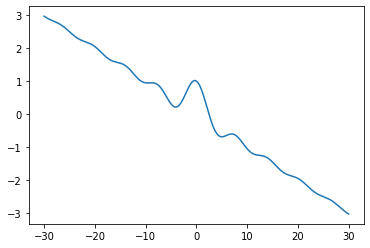

In [2]:
x = torch.linspace(-30, 30, 1000)
y = torch.sin(x)/x - x/10

plt.plot(x, y)
plt.show()

In [3]:
class Generator(nn.Module):
    def __init__(self, size, latent_dim):
        super().__init__()
        
        # Использование таких словарей позволяет нам варьировать параметры нашей сети в процессе использования
        self.activations = nn.ModuleDict([
                ['lrelu', nn.LeakyReLU(0.2, inplace=True)],
                ['relu', nn.ReLU(0.2)]])
        
        def block(in_feat, out_feat, normalize=True, activation='relu'): #activation='relu
            layers = [nn.Linear(in_feat, out_feat)] # Если мы создаем последовательность слоев - то мы задаем их
                                                    # с помощью списка.
            if normalize:
                layers.append(nn.BatchNorm1d(out_feat, 0.8))
            layers.append(self.activations[activation]) # Эта сторчка означает тоже самое что и
                                                       # layers.append(nn.LeakyReLU(0.2, inplace=True))
            return layers

        self.model = nn.Sequential(
            *block(latent_dim, 128, normalize=False), # Звездочка означает unpacking списка
            *block(128, 256, activation='lrelu'),
            *block(256, 512),
            *block(512, 1024),
            nn.Linear(1024, size),
            nn.Tanh()
        )
        # 2

    def forward(self, z):
        return self.model(z)

In [4]:
class Discriminator(nn.Module):
    def __init__(self, size):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(size, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
  

    def forward(self, x):
      return self.model(x)


In [5]:
n_epochs = 20 # количество эпох
lr = 0.0002 # шаг обучения

b1 = 0.5 # гиперпараметр для оптимайзера Adam
b2 = 0.999 # гиперпараметр для оптимайзера Adam

latent_dim = 100 # Размерность случайного вектора, который подается на вход генератору


sample_interval = 25 # количество картинок для отображения процесса обучения

In [6]:
generator = Generator(len(x), latent_dim)
discriminator = Discriminator(len(x))

# Для каждой нейронки свой опитимизатор
optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr, betas=(b1, b2))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(b1, b2))

# Но вот функция ошибки у нас будет одна общая
adversarial_loss = torch.nn.BCELoss()

In [7]:
d_loss_history = []
g_loss_history = []

[Epoch 0/20] [Batch 0/100] [D loss: 0.674076] [G loss: 0.663527]


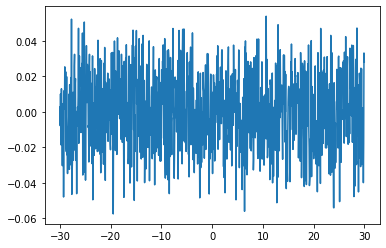

[Epoch 0/20] [Batch 25/100] [D loss: 0.343403] [G loss: 0.721786]


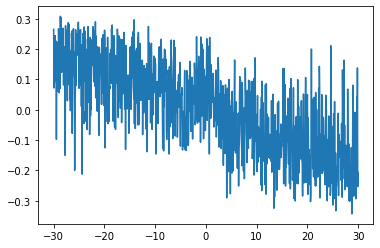

[Epoch 0/20] [Batch 50/100] [D loss: 0.380191] [G loss: 1.056815]


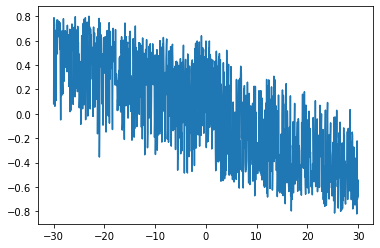

[Epoch 0/20] [Batch 75/100] [D loss: 0.274031] [G loss: 0.963771]


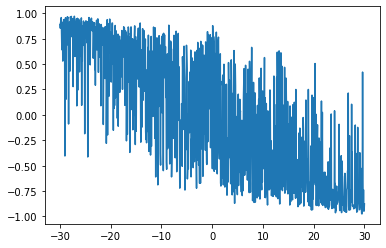

[Epoch 1/20] [Batch 0/100] [D loss: 0.441896] [G loss: 0.567105]


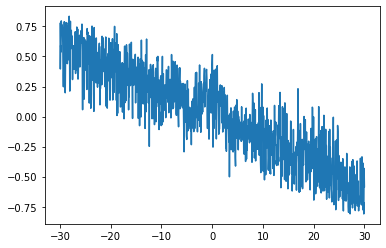

[Epoch 1/20] [Batch 25/100] [D loss: 0.425723] [G loss: 0.619838]


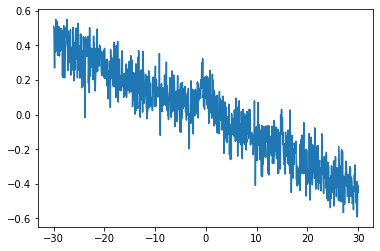

[Epoch 1/20] [Batch 50/100] [D loss: 0.388702] [G loss: 0.687824]


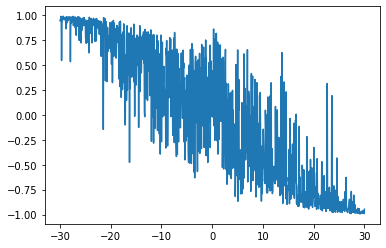

[Epoch 1/20] [Batch 75/100] [D loss: 0.384230] [G loss: 0.650341]


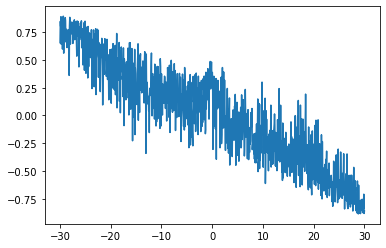

[Epoch 2/20] [Batch 0/100] [D loss: 0.501427] [G loss: 0.460150]


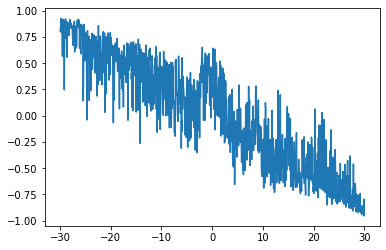

[Epoch 2/20] [Batch 25/100] [D loss: 0.446223] [G loss: 0.813711]


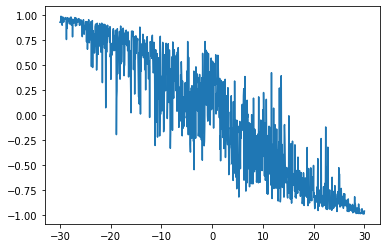

[Epoch 2/20] [Batch 50/100] [D loss: 0.403440] [G loss: 0.667478]


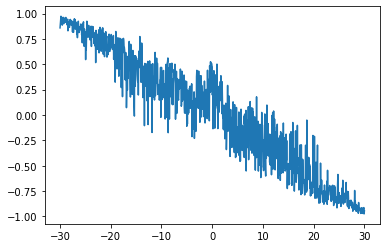

[Epoch 2/20] [Batch 75/100] [D loss: 0.363677] [G loss: 1.086811]


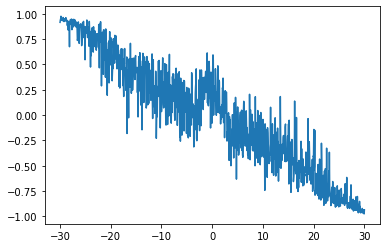

[Epoch 3/20] [Batch 0/100] [D loss: 0.290740] [G loss: 0.933292]


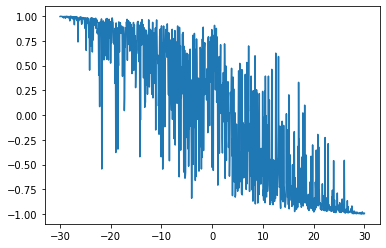

[Epoch 3/20] [Batch 25/100] [D loss: 0.366616] [G loss: 0.682233]


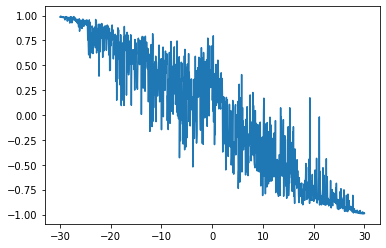

[Epoch 3/20] [Batch 50/100] [D loss: 0.637151] [G loss: 1.304668]


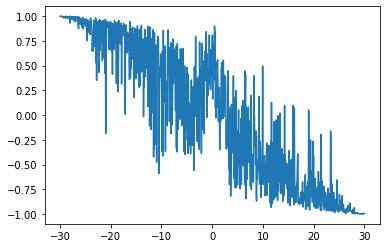

[Epoch 3/20] [Batch 75/100] [D loss: 0.306655] [G loss: 1.197670]


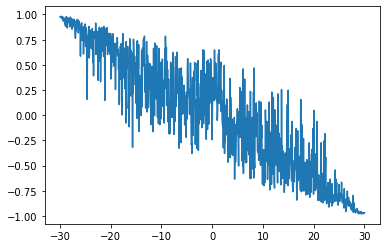

[Epoch 4/20] [Batch 0/100] [D loss: 0.297856] [G loss: 1.023407]


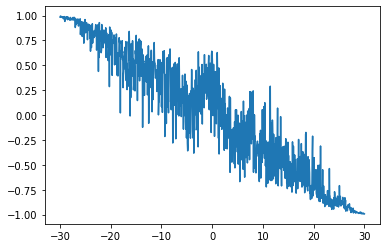

[Epoch 4/20] [Batch 25/100] [D loss: 0.355659] [G loss: 1.140795]


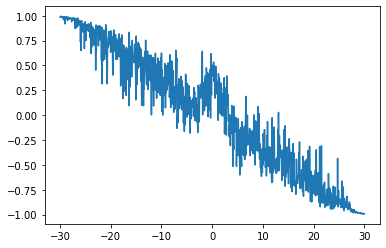

[Epoch 4/20] [Batch 50/100] [D loss: 0.270380] [G loss: 0.972875]


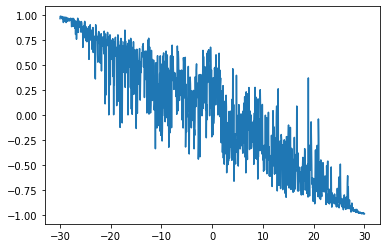

[Epoch 4/20] [Batch 75/100] [D loss: 0.324868] [G loss: 1.434906]


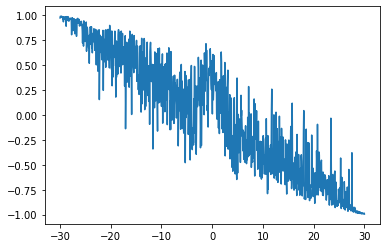

[Epoch 5/20] [Batch 0/100] [D loss: 0.287596] [G loss: 1.041756]


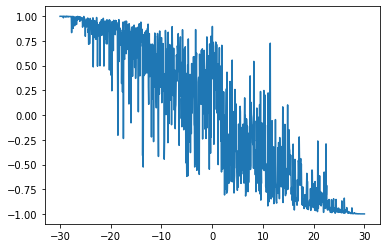

[Epoch 5/20] [Batch 25/100] [D loss: 0.136906] [G loss: 1.678697]


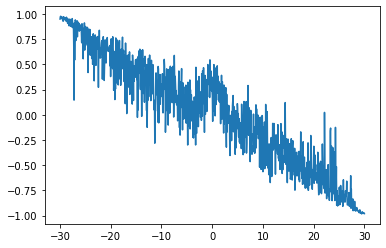

[Epoch 5/20] [Batch 50/100] [D loss: 0.382051] [G loss: 0.637852]


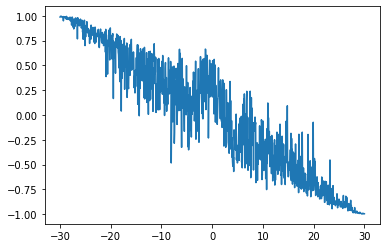

[Epoch 5/20] [Batch 75/100] [D loss: 0.185173] [G loss: 1.264418]


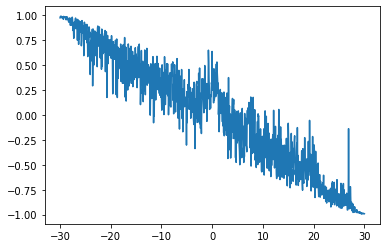

[Epoch 6/20] [Batch 0/100] [D loss: 0.132809] [G loss: 1.624116]


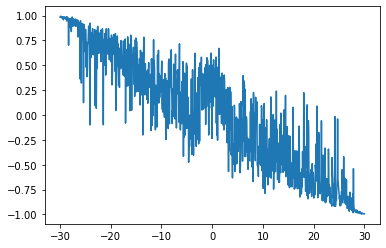

[Epoch 6/20] [Batch 25/100] [D loss: 1.306794] [G loss: 0.078773]


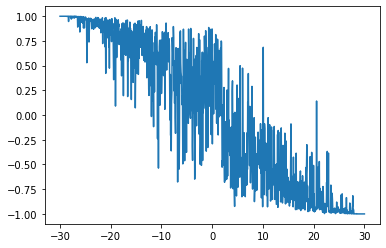

[Epoch 6/20] [Batch 50/100] [D loss: 0.232206] [G loss: 1.140425]


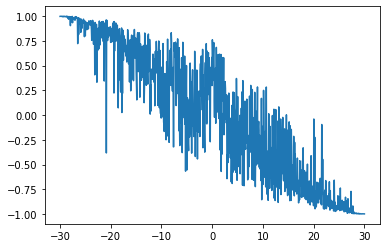

[Epoch 6/20] [Batch 75/100] [D loss: 0.151375] [G loss: 1.624286]


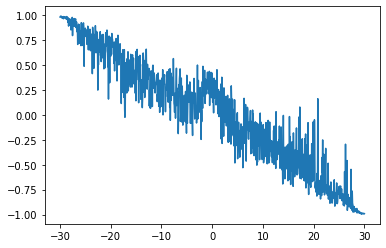

[Epoch 7/20] [Batch 0/100] [D loss: 0.134779] [G loss: 1.792705]


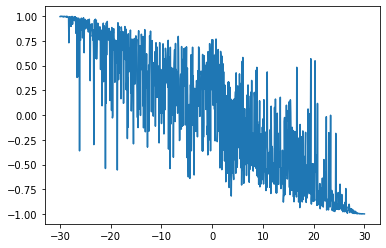

[Epoch 7/20] [Batch 25/100] [D loss: 0.096595] [G loss: 2.011985]


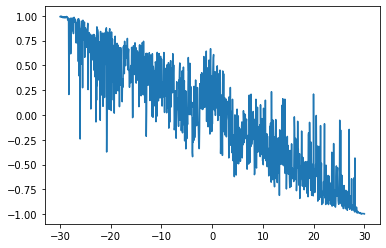

[Epoch 7/20] [Batch 50/100] [D loss: 0.102901] [G loss: 2.006378]


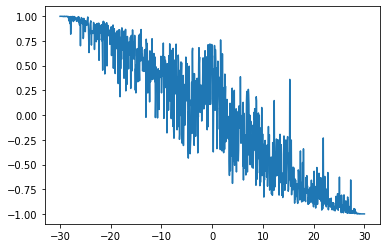

[Epoch 7/20] [Batch 75/100] [D loss: 0.247752] [G loss: 1.094467]


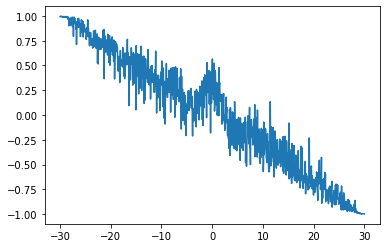

[Epoch 8/20] [Batch 0/100] [D loss: 0.150402] [G loss: 1.624397]


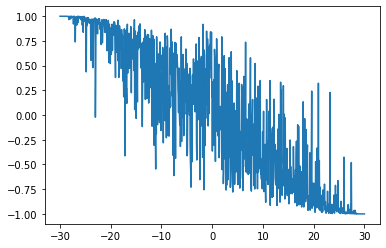

[Epoch 8/20] [Batch 25/100] [D loss: 0.081083] [G loss: 2.324170]


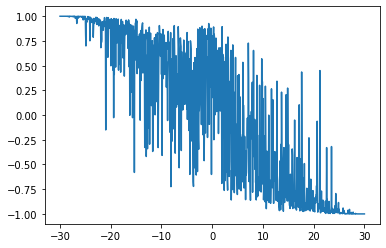

[Epoch 8/20] [Batch 50/100] [D loss: 0.064646] [G loss: 2.278144]


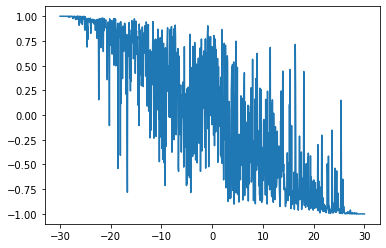

[Epoch 8/20] [Batch 75/100] [D loss: 0.039997] [G loss: 2.903439]


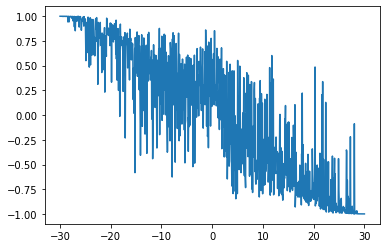

[Epoch 9/20] [Batch 0/100] [D loss: 1.609680] [G loss: 0.043135]


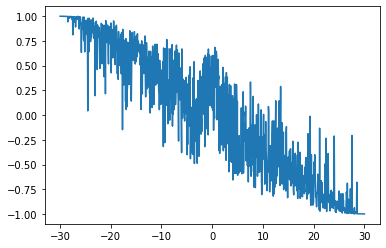

[Epoch 9/20] [Batch 25/100] [D loss: 0.200776] [G loss: 1.245819]


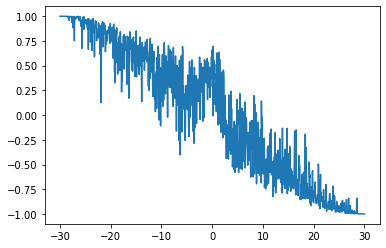

[Epoch 9/20] [Batch 50/100] [D loss: 0.121721] [G loss: 1.590256]


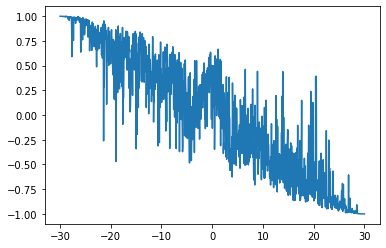

[Epoch 9/20] [Batch 75/100] [D loss: 0.097241] [G loss: 1.874292]


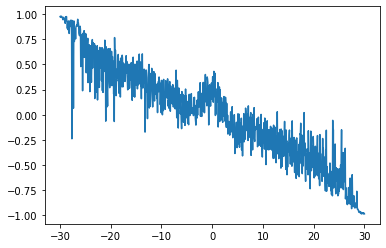

[Epoch 10/20] [Batch 0/100] [D loss: 0.053167] [G loss: 2.651133]


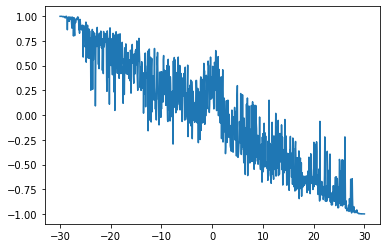

[Epoch 10/20] [Batch 25/100] [D loss: 0.039741] [G loss: 2.788687]


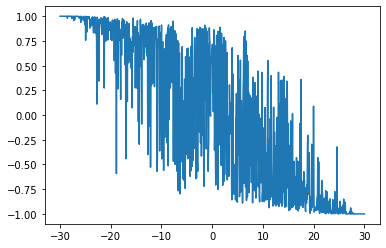

[Epoch 10/20] [Batch 50/100] [D loss: 0.034769] [G loss: 3.040978]


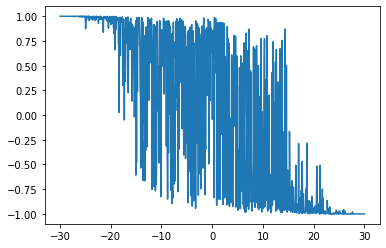

[Epoch 10/20] [Batch 75/100] [D loss: 0.026724] [G loss: 3.455366]


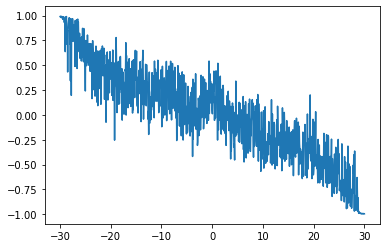

[Epoch 11/20] [Batch 0/100] [D loss: 0.019669] [G loss: 3.607758]


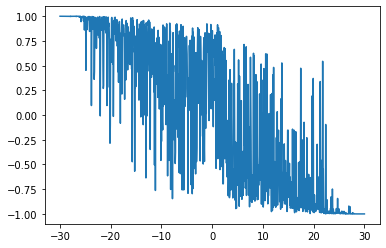

[Epoch 11/20] [Batch 25/100] [D loss: 0.014759] [G loss: 3.845292]


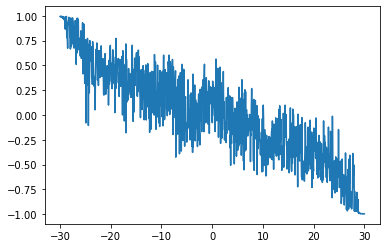

[Epoch 11/20] [Batch 50/100] [D loss: 0.014349] [G loss: 3.898408]


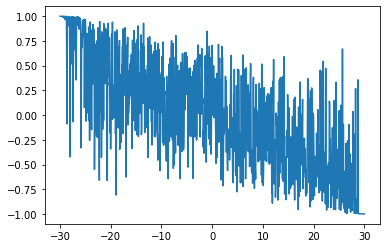

[Epoch 11/20] [Batch 75/100] [D loss: 0.010979] [G loss: 4.328040]


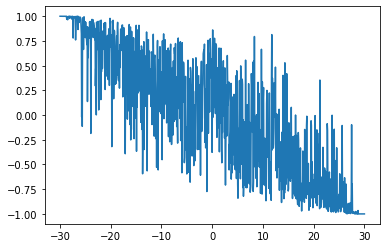

[Epoch 12/20] [Batch 0/100] [D loss: 0.009404] [G loss: 4.366067]


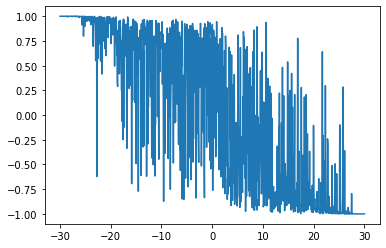

[Epoch 12/20] [Batch 25/100] [D loss: 0.008447] [G loss: 4.519131]


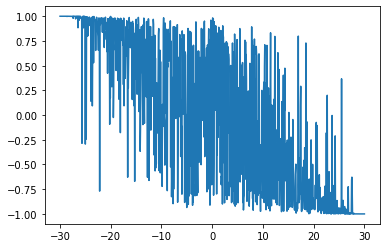

[Epoch 12/20] [Batch 50/100] [D loss: 0.006821] [G loss: 4.620178]


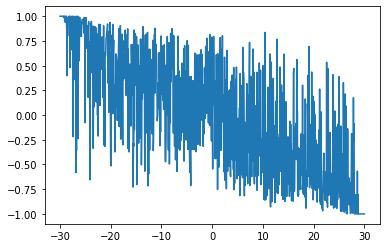

[Epoch 12/20] [Batch 75/100] [D loss: 0.006225] [G loss: 4.704549]


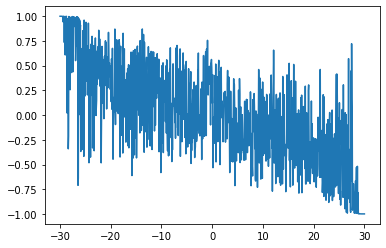

[Epoch 13/20] [Batch 0/100] [D loss: 0.005489] [G loss: 4.800128]


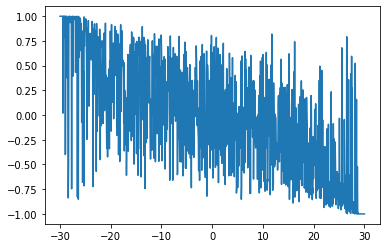

[Epoch 13/20] [Batch 25/100] [D loss: 0.004962] [G loss: 4.903699]


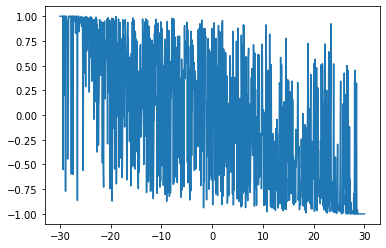

[Epoch 13/20] [Batch 50/100] [D loss: 0.005207] [G loss: 5.020122]


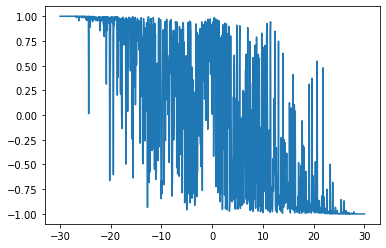

[Epoch 13/20] [Batch 75/100] [D loss: 0.005852] [G loss: 4.898259]


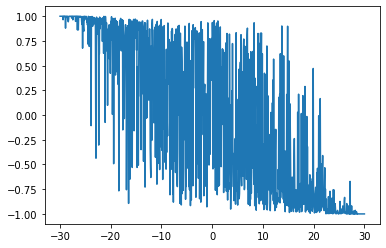

[Epoch 14/20] [Batch 0/100] [D loss: 0.004464] [G loss: 5.119797]


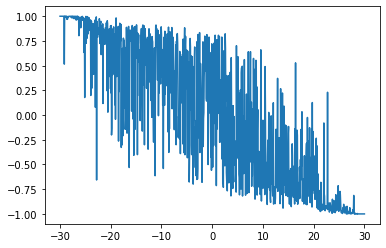

[Epoch 14/20] [Batch 25/100] [D loss: 0.003524] [G loss: 5.339824]


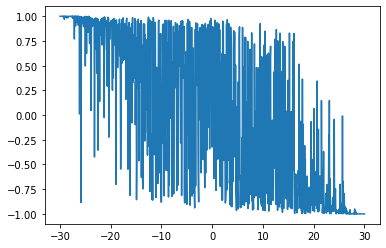

[Epoch 14/20] [Batch 50/100] [D loss: 0.004171] [G loss: 5.122184]


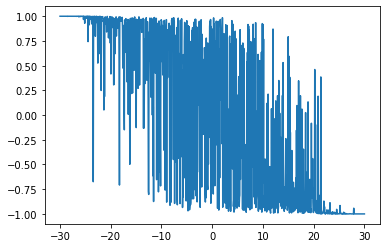

[Epoch 14/20] [Batch 75/100] [D loss: 0.004998] [G loss: 5.012475]


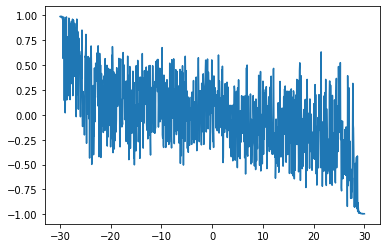

[Epoch 15/20] [Batch 0/100] [D loss: 0.003871] [G loss: 5.138010]


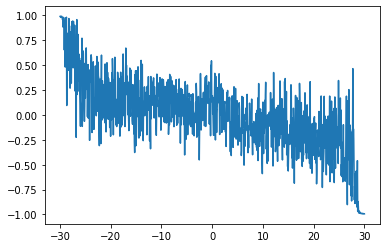

[Epoch 15/20] [Batch 25/100] [D loss: 0.003089] [G loss: 5.363768]


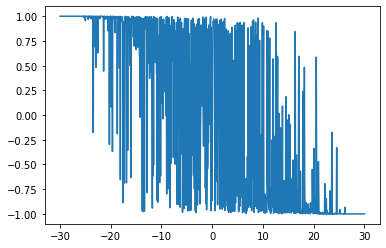

[Epoch 15/20] [Batch 50/100] [D loss: 0.003247] [G loss: 5.304631]


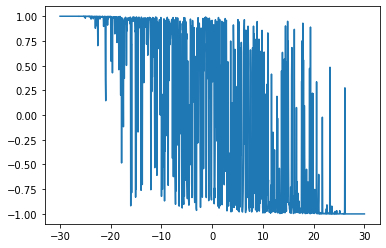

[Epoch 15/20] [Batch 75/100] [D loss: 0.003036] [G loss: 5.388231]


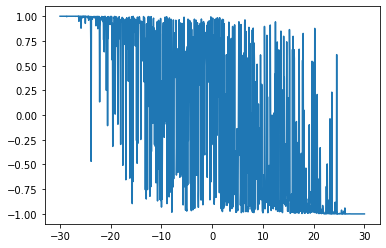

[Epoch 16/20] [Batch 0/100] [D loss: 0.003131] [G loss: 5.377417]


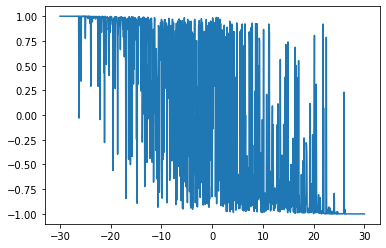

[Epoch 16/20] [Batch 25/100] [D loss: 0.002569] [G loss: 5.625858]


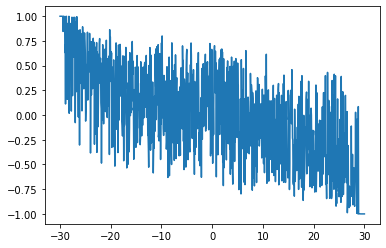

[Epoch 16/20] [Batch 50/100] [D loss: 0.002948] [G loss: 5.533346]


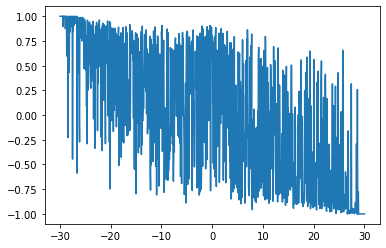

[Epoch 16/20] [Batch 75/100] [D loss: 0.002065] [G loss: 5.835429]


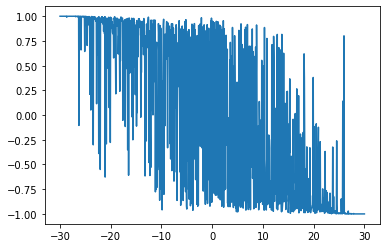

[Epoch 17/20] [Batch 0/100] [D loss: 0.002519] [G loss: 5.763835]


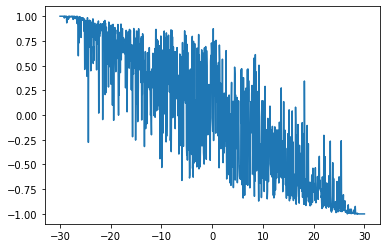

[Epoch 17/20] [Batch 25/100] [D loss: 0.002120] [G loss: 5.878912]


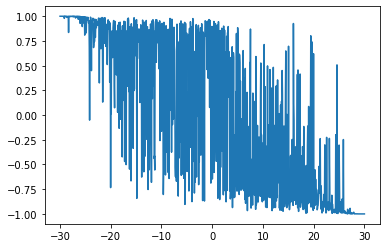

[Epoch 17/20] [Batch 50/100] [D loss: 0.002230] [G loss: 5.870074]


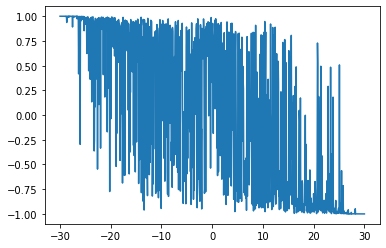

[Epoch 17/20] [Batch 75/100] [D loss: 0.001605] [G loss: 6.131824]


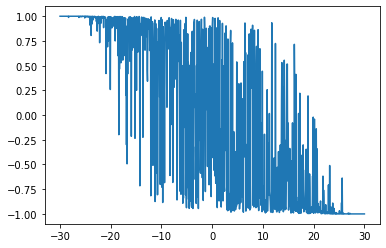

[Epoch 18/20] [Batch 0/100] [D loss: 0.001847] [G loss: 5.917074]


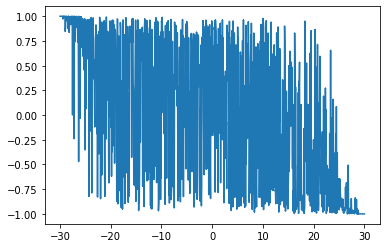

[Epoch 18/20] [Batch 25/100] [D loss: 0.001407] [G loss: 6.200020]


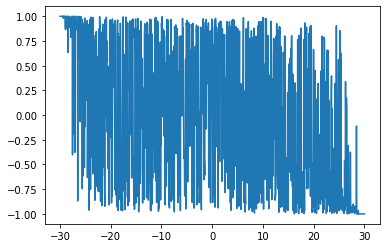

[Epoch 18/20] [Batch 50/100] [D loss: 0.001794] [G loss: 5.925620]


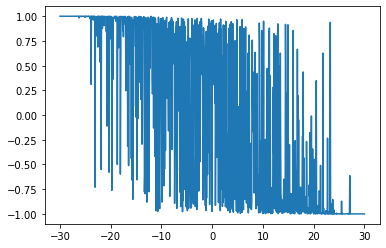

[Epoch 18/20] [Batch 75/100] [D loss: 0.001308] [G loss: 6.246464]


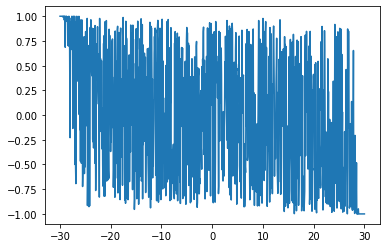

[Epoch 19/20] [Batch 0/100] [D loss: 0.001559] [G loss: 6.107154]


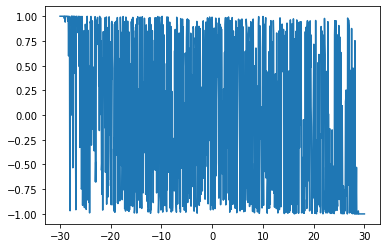

[Epoch 19/20] [Batch 25/100] [D loss: 0.001178] [G loss: 6.369394]


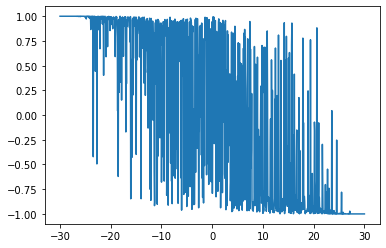

[Epoch 19/20] [Batch 50/100] [D loss: 0.001577] [G loss: 6.033191]


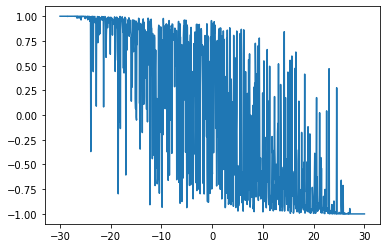

[Epoch 19/20] [Batch 75/100] [D loss: 0.001208] [G loss: 6.347518]


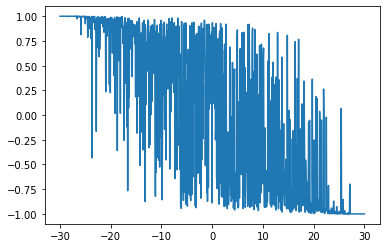

In [8]:
import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='red', label='D loss')
green_patch = mpatches.Patch(color='green', label='G loss')

batch_size = 128
y = y.repeat((batch_size, 1))

for epoch in range(n_epochs):
    for i in range(100):
        
##################### Лnnейблы для данных: 1 - настоящие, 0 - сгенерированные ########
        valid = torch.FloatTensor(batch_size, 1).fill_(1.0)
        fake = torch.FloatTensor(batch_size, 1).fill_(0.0)

        real_y = y


######################  Тренировка генератора    ##########################

        optimizer_G.zero_grad()
    
        #генерация шума
        z = torch.FloatTensor(np.random.normal(0, 1, (batch_size, latent_dim)))
        
        # Генерируем даные Генератором на основе шума
        gen_y = generator(z)
        
        # Подаем сгенерированые данные на Дискриминатор 
        validity = discriminator(gen_y)
        
        # Тут сравниваем предсказанные значения Дискриминатора(на основе сгенерировнных данных) с настоящими
        g_loss = adversarial_loss(validity, valid)
        

        # Делаем шаг обучения нашего Генератора
        g_loss.backward()
        optimizer_G.step()

######################  Тренировка дискриминатора    ##########################

        optimizer_D.zero_grad()
        
        # Получаем предсказания дискриминатора на основе реальных данных
        real_pred = discriminator(real_y)
        
        # Тут сравниваем предсказанные значения Дискриминатора(на основе настоящих данных) с настоящими

        d_real_loss = adversarial_loss(real_pred, valid)
        
        # Опять делаем предсказание на Дискриминаторе с помощью сгенерированных данных
        fake_pred = discriminator(gen_y.detach())
        
        # расчитываем ошибку предсказанного с фейковыми лейблами
        d_fake_loss = adversarial_loss(fake_pred, fake)
        
        # И усредняем два лосса в один
        d_loss = (d_real_loss + d_fake_loss) / 2

        d_loss.backward()
        optimizer_D.step()
        
######## Отображение процесса обучения и вывод функций потерь ############
        batches_done = epoch * 100 + i
    
        if batches_done % sample_interval == 0:
            with torch.no_grad():
                #plt.clf()

                #display.clear_output(wait=False)

                print("[Epoch %d/%d] [Batch %d/%d] [D loss: %f] [G loss: %f]"% (epoch, n_epochs, i, 100, d_loss.item(), g_loss.item()) ) 


                #display.display(plt.gcf())

                d_loss = d_loss.detach()
                g_loss = g_loss.detach()


                d_loss_history.append(d_loss)
                g_loss_history.append(g_loss)

                plt.plot(x, gen_y[0])
                plt.show()

            

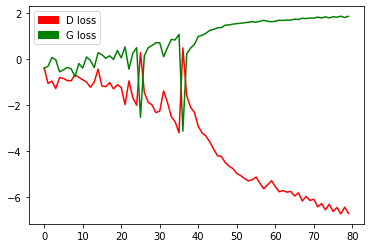

In [9]:
plt.plot(np.log(np.array(d_loss_history)), label='D loss', color = 'red')
plt.plot(np.log(np.array(g_loss_history)), label='G loss', color = 'green')
plt.legend(handles=[red_patch, green_patch])
plt.show()